In [1]:
import ipyrad.analysis as ipa
import pandas as pd
import sklearn
import toyplot 
import toyplot.png
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
comp_data = "phys_both_outfiles/phys_both.snps.hdf5"

In [3]:
comp_imap = {
    "berm" : ["Bermuda_100","Bermuda_103", "Bermuda_15", 
              "Bermuda_19", "Bermuda_28", "Bermuda_30", 
              "Bermuda_54", "Bermuda_55", "Bermuda_63",
              "Bermuda_65", "Bermuda_67", "Bermuda_68",
              "Bermuda_69", "Bermuda_94", "Bermuda_8", 
              "Bermuda_80", "Bermuda_84", "Bermuda_85",
              "Bermuda_94"],
    "guam" : ["Guam_104460", "Guam_104461", "Guam_104464",
              "Guam_104465"],
    "s_afr" : ["South_Africa"],
    "texas" : ["8_TX2017_028", "82_TX2016_049", "6_TX2017_027", 
               "59_TX2016_048", "42_TX2016_046", "13_TX2016_043"]
}
minmap = {i: 0.5 for i in comp_imap}

# PCA analysis

In [4]:
comp_pca = ipa.pca(
    data = comp_data,
    imap = comp_imap,
    minmap = minmap,
    mincov = 1,)

Samples: 29
Sites before filtering: 101658
Filtered (indels): 0
Filtered (bi-allel): 3584
Filtered (mincov): 154
Filtered (minmap): 95712
Filtered (subsample invariant): 8687
Filtered (minor allele frequency): 0
Filtered (combined): 96924
Sites after filtering: 5440
Sites containing missing values: 5372 (98.75%)
Missing values in SNP matrix: 30572 (19.38%)
SNPs (total): 5440
SNPs (unlinked): 404
Imputation (null; sets to 0): 100.0%, 0.0%, 0.0%


In [5]:
comp_pca.run(nreplicates=100, seed=123)
results = pd.DataFrame(comp_pca.pcaxes[0], index=comp_pca.names)

Subsampling SNPs: 404/5440


Text(0, 0.5, 'PCA1')

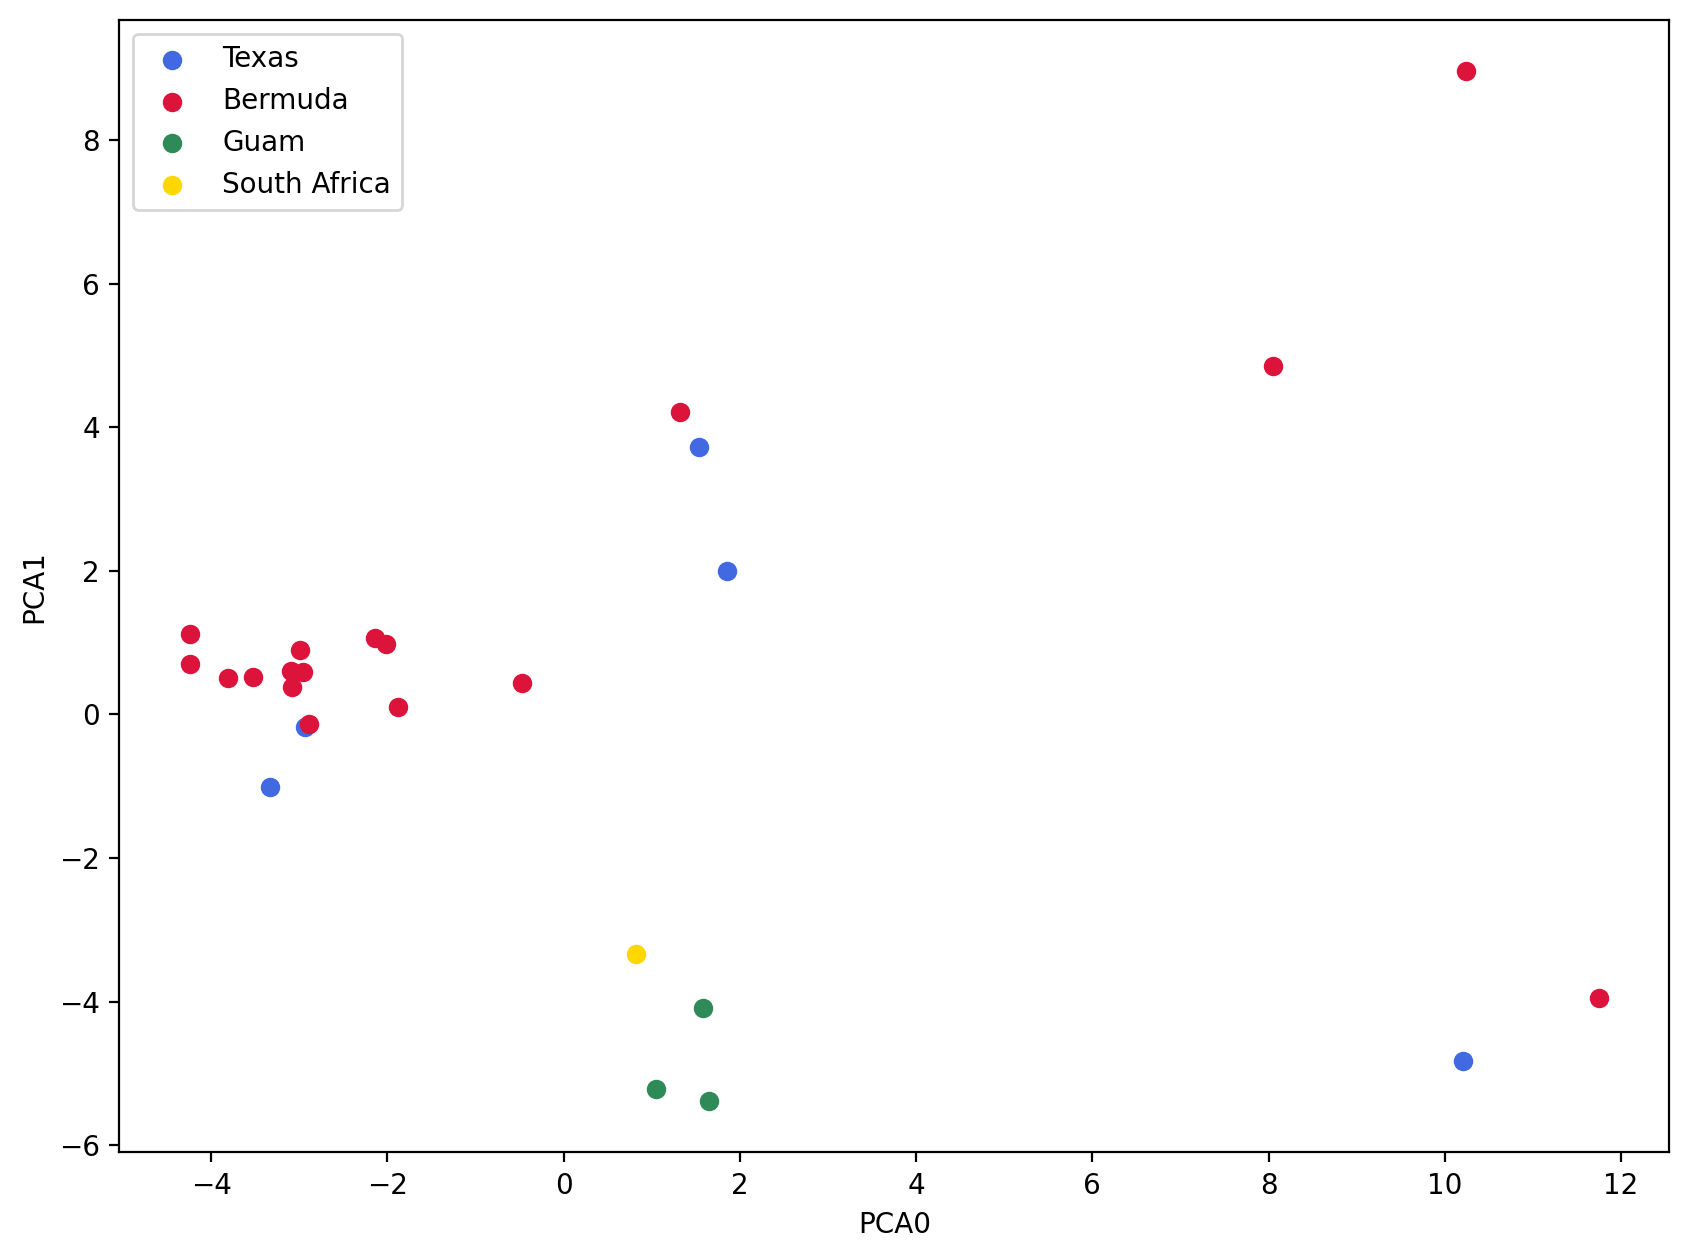

In [50]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[0].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[0].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[0].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[0].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA0")
ax.set_ylabel("PCA1")



Text(0, 0.5, 'PCA1')

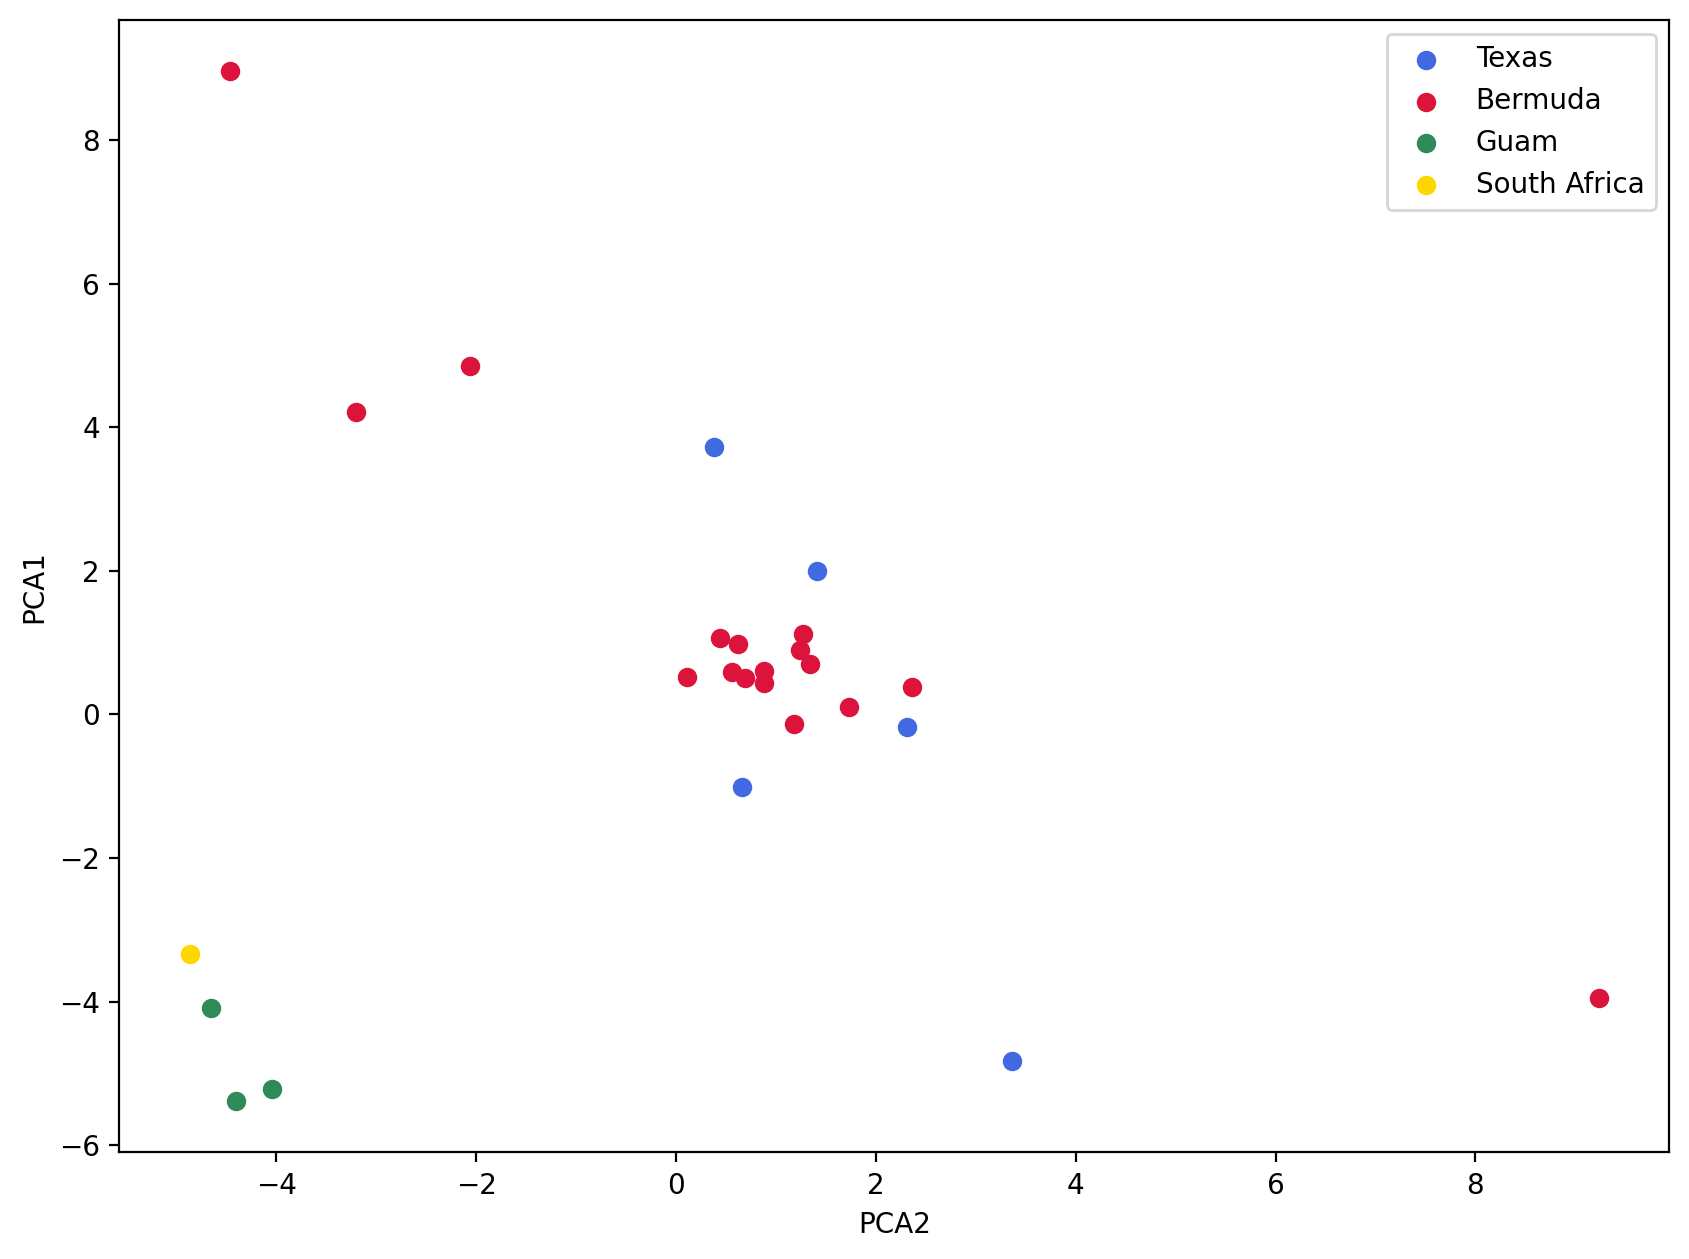

In [52]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[2].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[2].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[2].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[2].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA2")
ax.set_ylabel("PCA1")

# Structure Analysis

In [8]:
comp_struct = ipa.structure(
    name="comp",
    data = comp_data,
    imap = comp_imap,
    minmap = minmap,
    mincov = 0.9)


100 previous results loaded for run [comp]
Samples: 29
Sites before filtering: 101658
Filtered (indels): 0
Filtered (bi-allel): 3584
Filtered (mincov): 100625
Filtered (minmap): 95712
Filtered (subsample invariant): 8687
Filtered (minor allele frequency): 0
Filtered (combined): 101651
Sites after filtering: 713
Sites containing missing values: 645 (90.46%)
Missing values in SNP matrix: 1024 (4.95%)
SNPs (total): 713
SNPs (unlinked): 89


In [9]:
comp_struct.mainparams.burnin = 5000
comp_struct.mainparams.numreps = 10000
comp_struct.run(nreps=20, kpop=[2, 3, 4, 5], auto=True)

[####################] 100% 0:03:27 | running 40 structure jobs 


In [10]:
comp_etable = comp_struct.get_evanno_table([2, 3, 4, 5])
display(Markdown(comp_etable.to_markdown()))

|    |   Nreps |    lnPK |   lnPPK |    deltaK |   estLnProbMean |   estLnProbStdev |
|---:|--------:|--------:|--------:|----------:|----------------:|-----------------:|
|  2 |      25 |   0     |   0     | 0         |        -657.38  |          22.7608 |
|  3 |      25 |   7.476 |   1.332 | 0.0195536 |        -649.904 |          68.1204 |
|  4 |      25 |   6.144 |  54.244 | 1.20246   |        -643.76  |          45.1108 |
|  5 |      25 | -48.1   |   0     | 0         |        -691.86  |         103.156  |

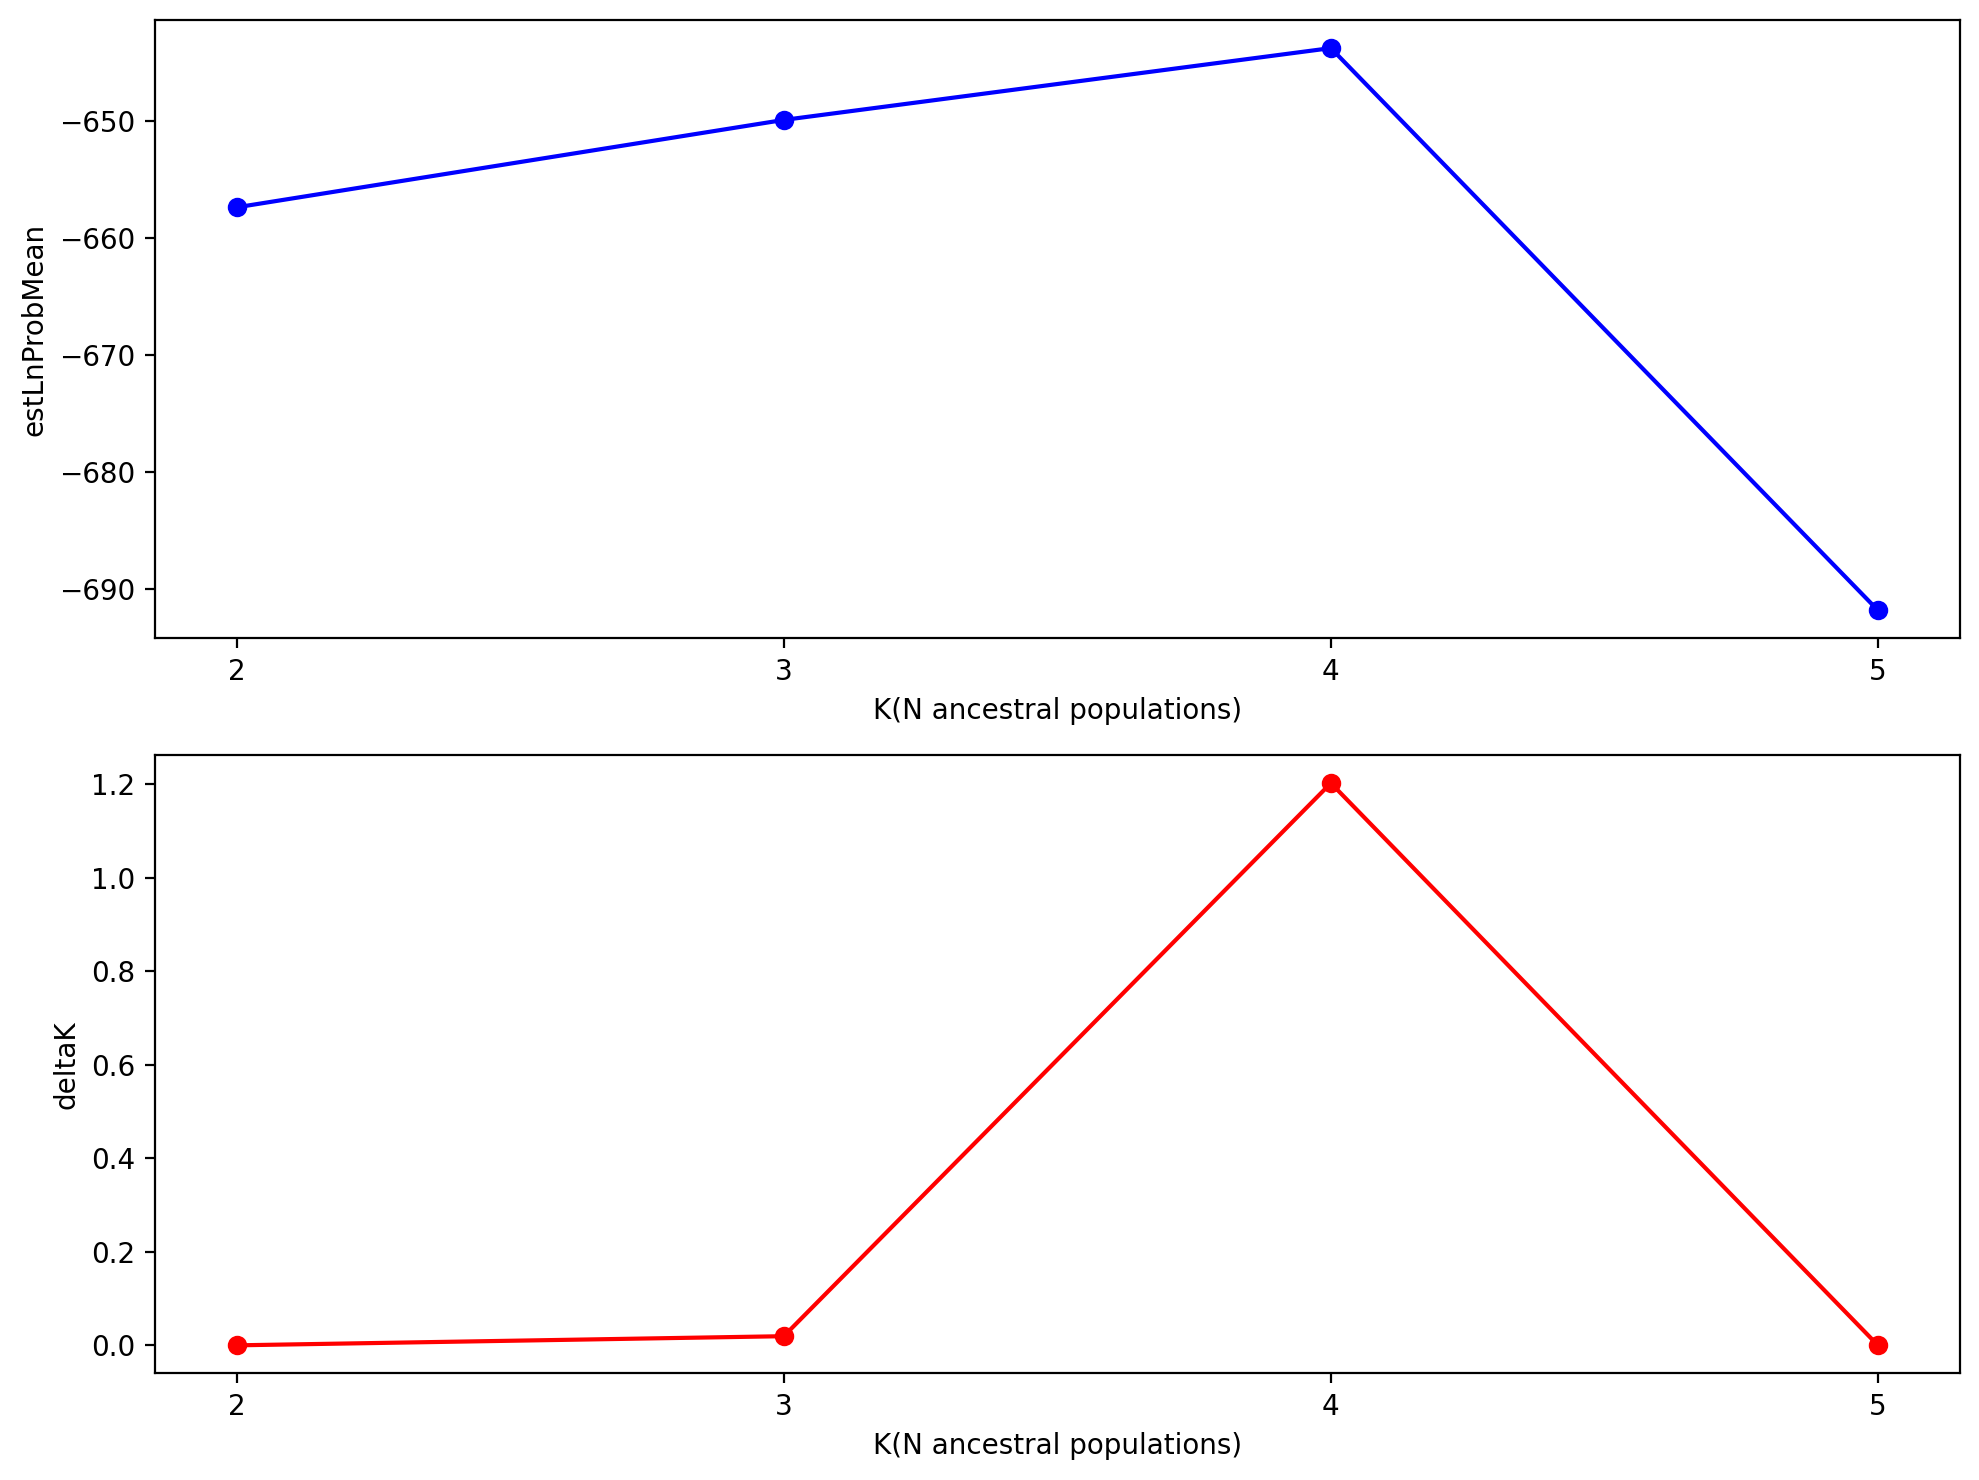

In [51]:
fig, [ax, ax2] = plt.subplots(2,figsize = (10,7.5), dpi=200,)
ax.plot(comp_etable.index, comp_etable.estLnProbMean, "-bo",)

ax.set_xticks([2,3,4,5])
ax.set_ylabel("estLnProbMean")
ax.set_xlabel("K(N ancestral populations)")


ax2.plot(comp_etable.index, comp_etable.deltaK, "-ro", zorder=2)

ax2.set_xticks([2,3,4,5])
ax2.set_ylabel("deltaK")
ax2.set_xlabel("K(N ancestral populations)")

fig.tight_layout() 

In [12]:
k = 4
table = comp_struct.get_clumpp_table(k)

[K4] 25/25 results permuted across replicates (max_var=0).


In [13]:
# sort list by columns
table.sort_values(by=list(range(k)), inplace=True)

# or, sort by a list of names (here taken from imap)
import itertools
onames = list(itertools.chain(*comp_imap.values()))
table = table.loc[onames]


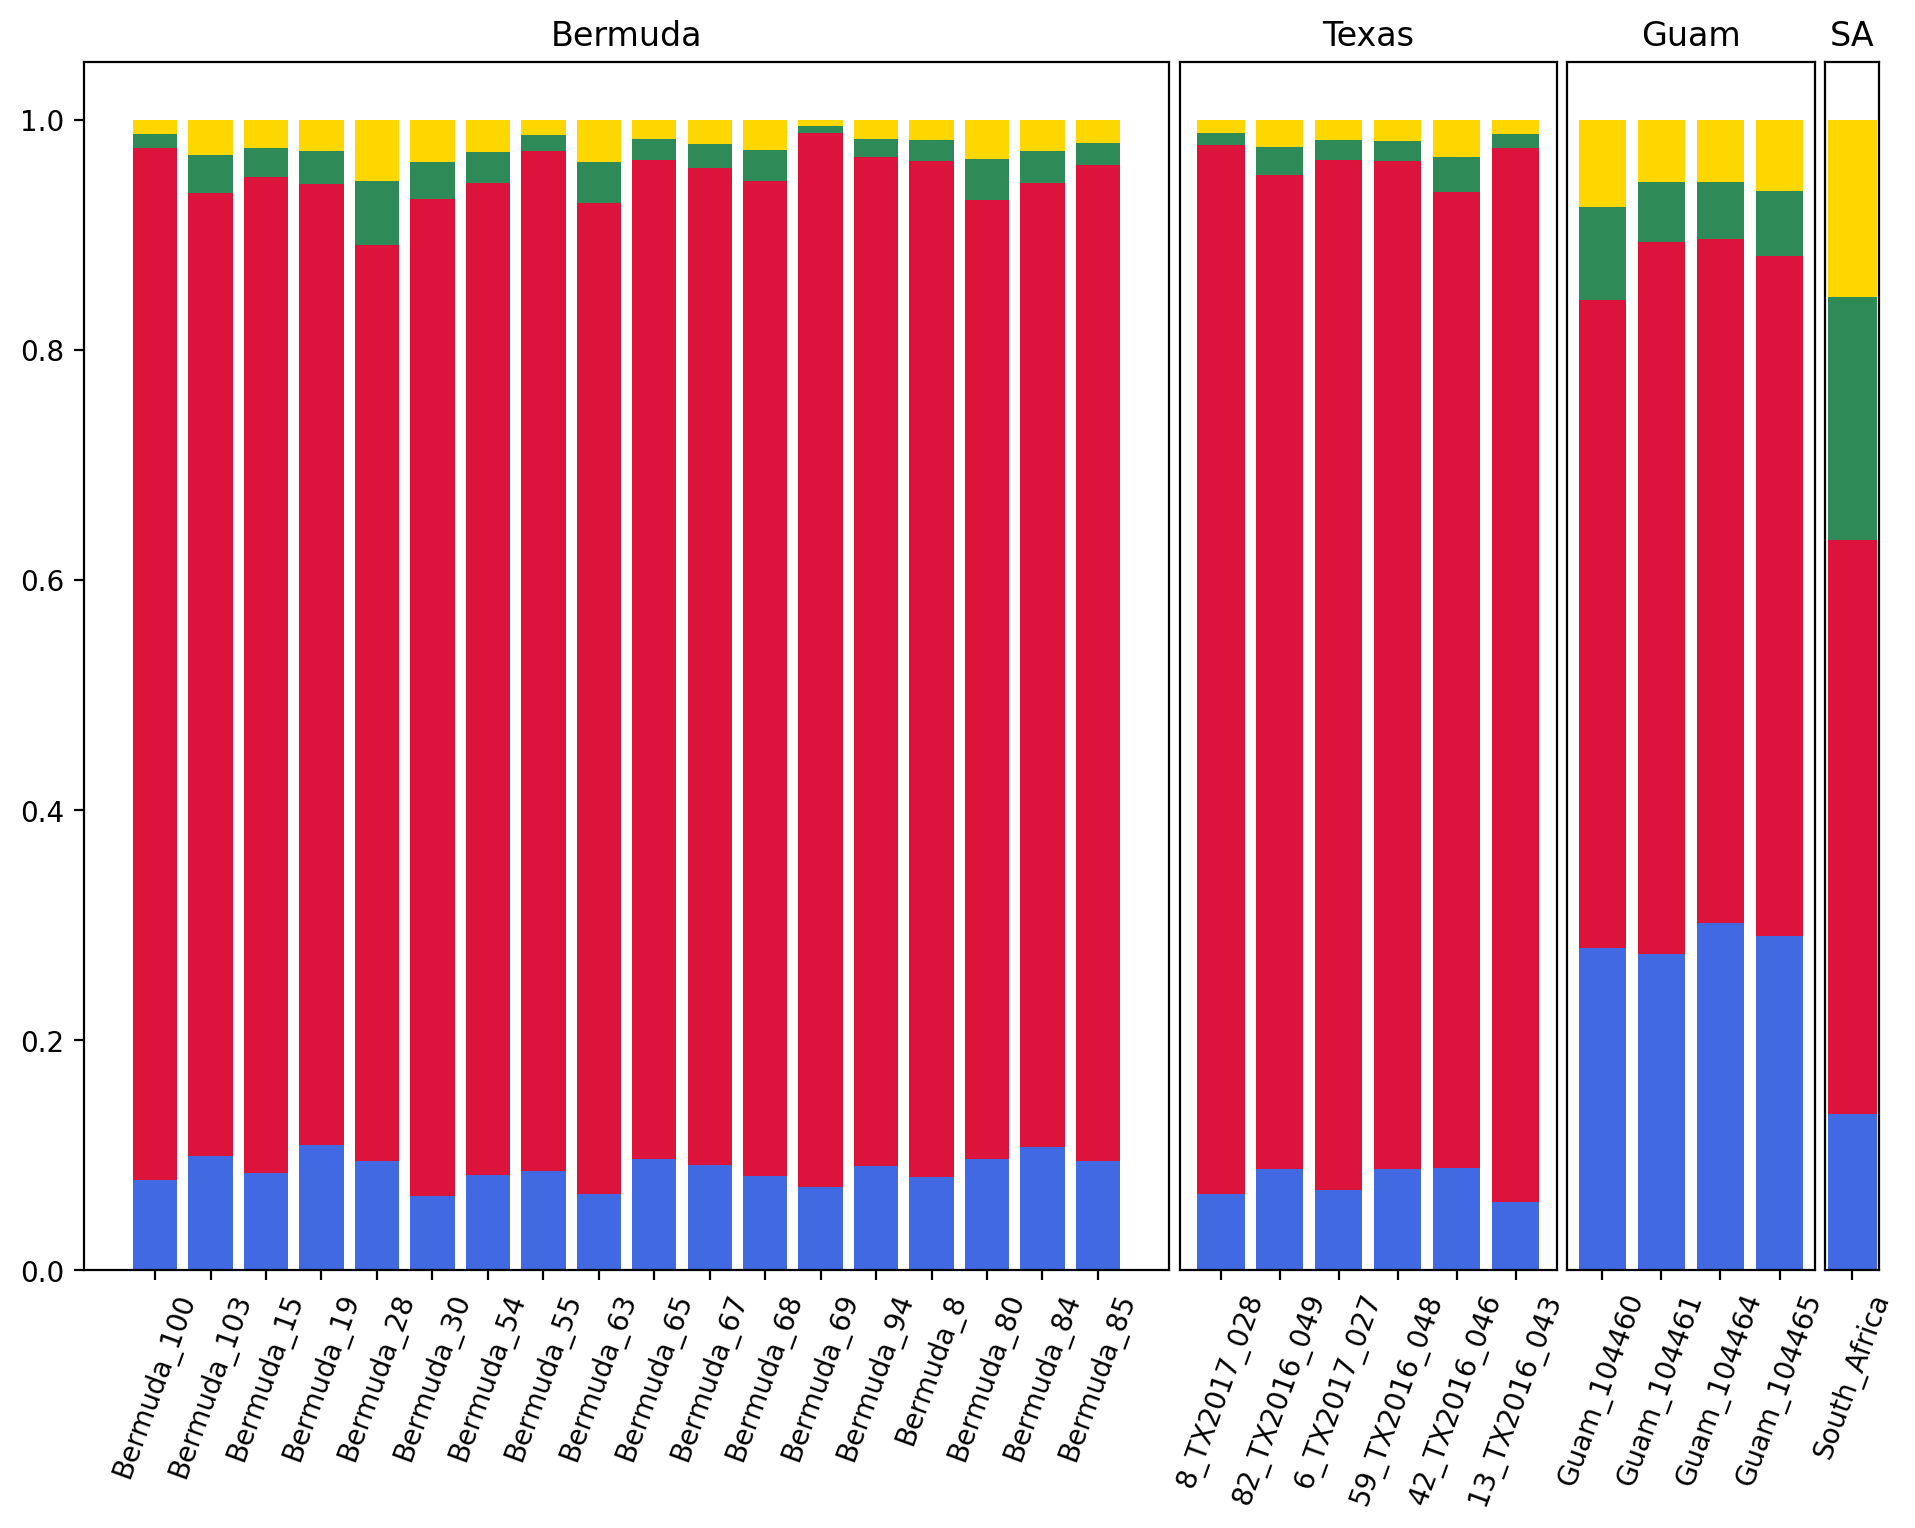

In [53]:
fig = plt.figure( figsize = (12,8), dpi=200)
gs = fig.add_gridspec(1, 29)


ax1 = fig.add_subplot(gs[0:17])
plt.xticks(rotation=45) 
ax1.bar(table.index[0:19], table[0].iloc[0:19], color = "royalblue")
ax1.bar(table.index[0:19], table[3].iloc[0:19], bottom = table[0].iloc[0:19], color = "crimson")
ax1.bar(table.index[0:19], table[1].iloc[0:19], bottom = table[3].iloc[0:19]+table[0].iloc[0:19], color = "seagreen")
ax1.bar(table.index[0:19], table[2].iloc[0:19], bottom = table[0].iloc[0:19]+table[3].iloc[0:19]+table[1].iloc[0:19], color = "gold")
ax1.tick_params(axis='x', rotation=70)
ax1.set_title("Bermuda")

ax2 = fig.add_subplot(gs[17:23], sharey = ax1 )
ax2.bar(table.index[24:], table[0].iloc[24:], color = "royalblue")
ax2.bar(table.index[24:], table[3].iloc[24:], bottom = table[0].iloc[24:], color = "crimson")
ax2.bar(table.index[24:], table[1].iloc[24:], bottom = table[3].iloc[24:]+table[0].iloc[24:], color = "seagreen")
ax2.bar(table.index[24:], table[2].iloc[24:], bottom = table[0].iloc[24:]+table[3].iloc[24:]+table[1].iloc[24:], color = "gold")
ax2.tick_params(axis='x', rotation=70)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_title("Texas")

ax3 = fig.add_subplot(gs[23:27], sharey = ax1 )
ax3.bar(table.index[19:23], table[0].iloc[19:23], color = "royalblue")
ax3.bar(table.index[19:23], table[3].iloc[19:23], bottom = table[0].iloc[19:23], color = "crimson")
ax3.bar(table.index[19:23], table[1].iloc[19:23], bottom = table[3].iloc[19:23]+table[0].iloc[19:23], color = "seagreen")
ax3.bar(table.index[19:23], table[2].iloc[19:23], bottom = table[0].iloc[19:23]+table[3].iloc[19:23]+table[1].iloc[19:23], color = "gold")
ax3.tick_params(axis='x', rotation=70)
ax3.axes.get_yaxis().set_visible(False)
ax3.set_title("Guam")

ax4 = fig.add_subplot(gs[27], sharey = ax1)
ax4.bar(table.index[23], table[0].iloc[23], color = "royalblue")
ax4.bar(table.index[23], table[3].iloc[23], bottom = table[0].iloc[23], color = "crimson")
ax4.bar(table.index[23], table[1].iloc[23], bottom = table[3].iloc[23]+table[0].iloc[23], color = "seagreen")
ax4.bar(table.index[23], table[2].iloc[23], bottom = table[0].iloc[23]+table[3].iloc[23]+table[1].iloc[23], color = "gold")
ax4.tick_params(axis='x', rotation=70)
ax4.axes.get_yaxis().set_visible(False)
ax4.set_title("SA")

fig.show()


